## 2. Data Exploration and Preprocessing

#### **Task 1:** Data Exploration

**Step 1: Load the Dataset**

In [2]:
import pandas as pd

# Load the dataset
data_path = "../data/boston_housing.csv"
df = pd.read_csv(data_path)

# Display the first 5 rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


**Step 2: Explore Data Structure and Summary Statistics**

In [3]:
# Check data types and non-null counts
print(df.info())

# Summary statistics for numerical features
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695   

**Step 3: Visualize Relationships with Target Variable (MEDV)**

Correlation matrix of all features including target

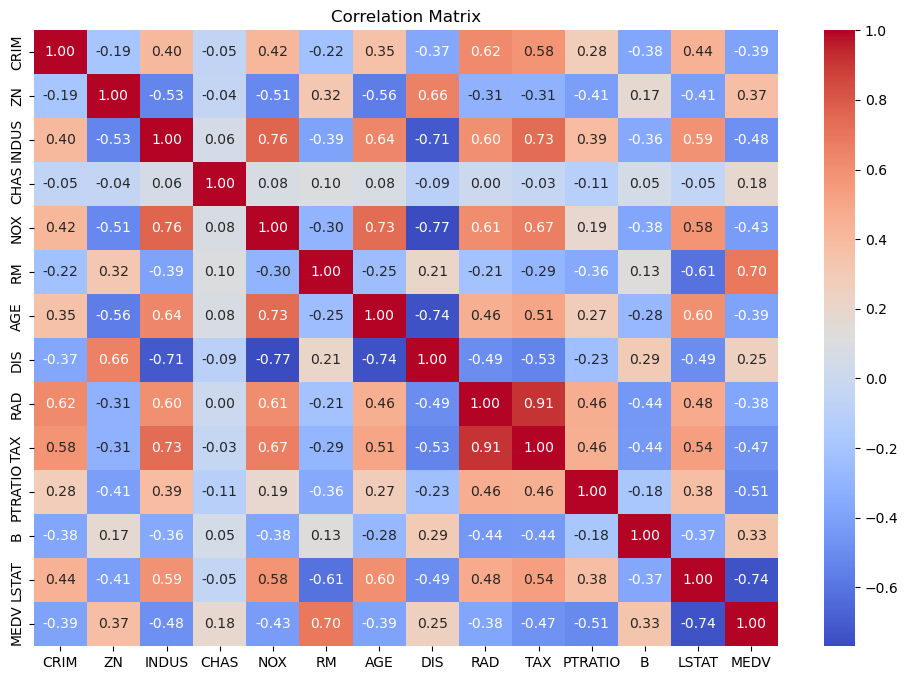

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Top features correlated with MEDV
print(corr_matrix['MEDV'].sort_values(ascending=False))

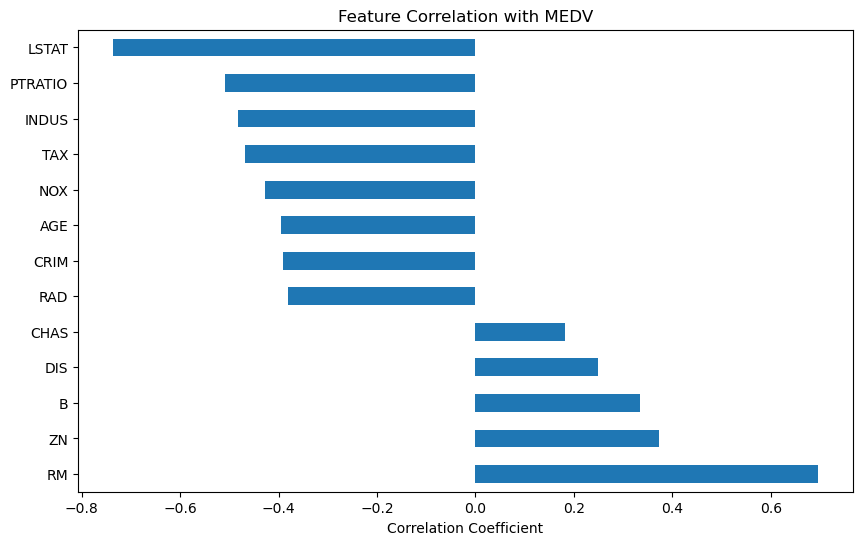

In [5]:
# Calculate correlations with MEDV
corr_with_target = df.corr()['MEDV'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
corr_with_target.drop('MEDV').plot.barh()  # Horizontal bar chart
plt.title("Feature Correlation with MEDV")
plt.xlabel("Correlation Coefficient")
plt.show()

Pairwise scatter plots for top 6 features correlated to target 'MEDV' (1 top positive and 4 top negative)

['RM', 'TAX', 'INDUS', 'PTRATIO', 'LSTAT']


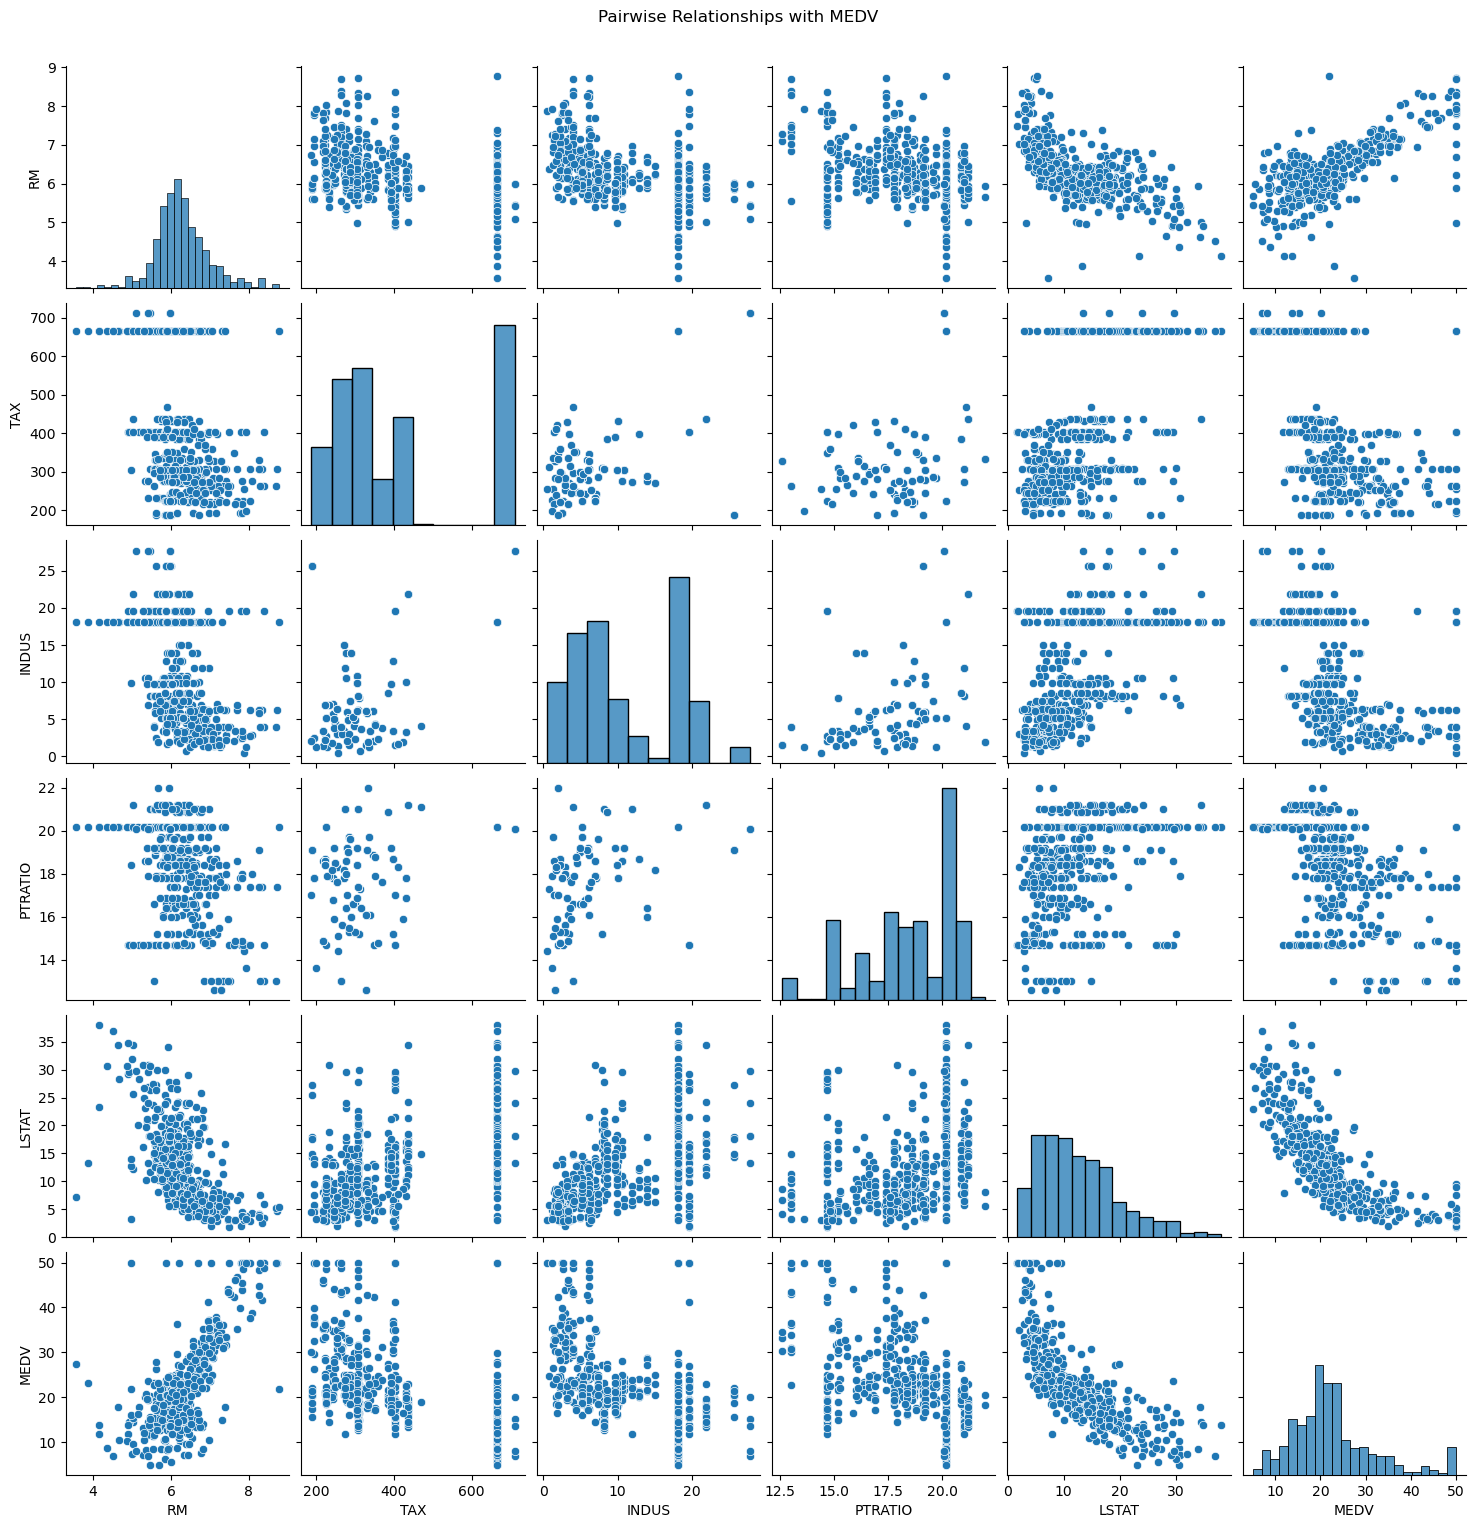

In [6]:
# Top correlated features
top_features = corr_with_target.drop('MEDV').head(1).index.tolist() + \
               corr_with_target.drop('MEDV').tail(4).index.tolist()
print(top_features)

# Pairplot for selected features + MEDV
sns.pairplot(df[top_features + ['MEDV']])
plt.suptitle("Pairwise Relationships with MEDV", y=1.02)
plt.show()

Hist Plot of target variable

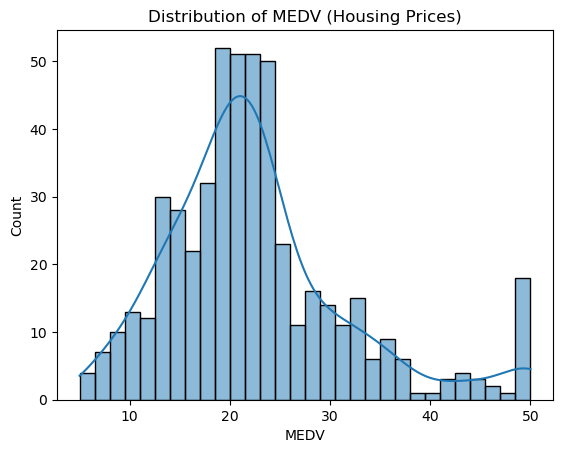

In [7]:
# Distribution of MEDV (target)
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title("Distribution of MEDV (Housing Prices)")
plt.show()

Joint plot of top 6 features with 'MEDV'

Top Positive Correlations with MEDV:
MEDV    1.0
Name: MEDV, dtype: float64

Top Negative Correlations with MEDV:
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


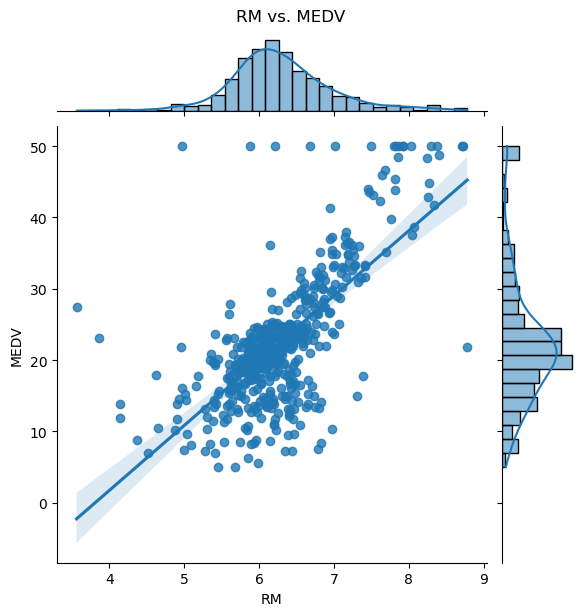

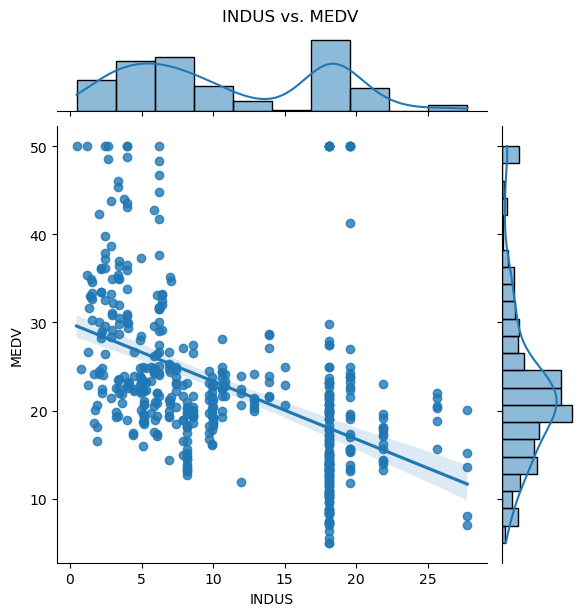

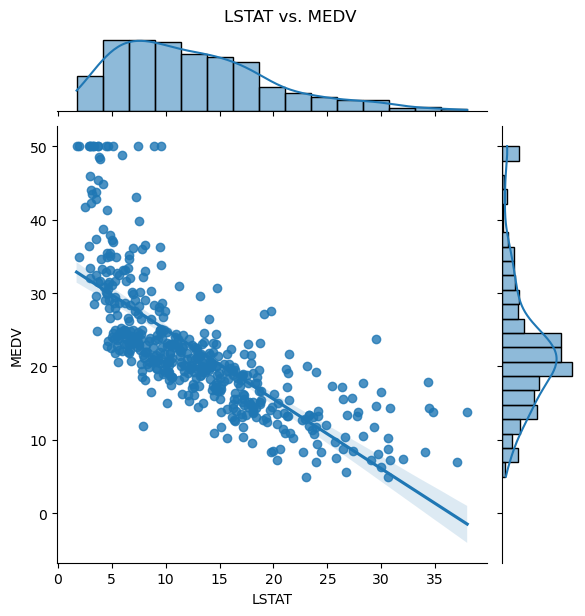

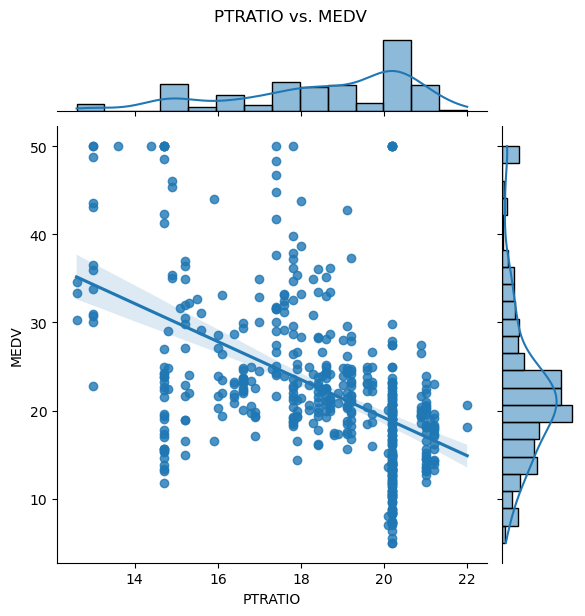

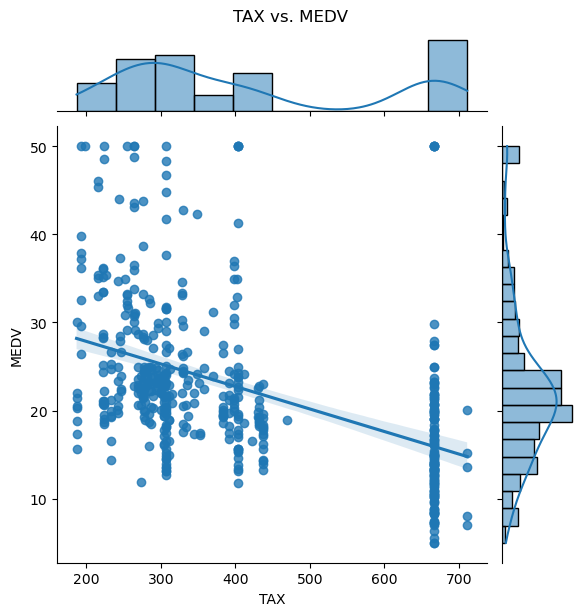

In [13]:
# Top 3 positively correlated
print("Top Positive Correlations with MEDV:")
print(corr_with_target.head(1))  # Includes MEDV itself

# Top 3 negatively correlated
print("\nTop Negative Correlations with MEDV:")
print(corr_with_target.tail(3))

# Detailed plots for top features
for feature in ['RM']:  # Positive feature
    sns.jointplot(x=feature, y='MEDV', data=df, kind='reg')
    plt.suptitle(f"{feature} vs. MEDV", y=1.02)
    plt.show()

for feature in ['INDUS', 'LSTAT', 'PTRATIO', 'TAX']:  # Negative feature
    sns.jointplot(x=feature, y='MEDV', data=df, kind='reg')
    plt.suptitle(f"{feature} vs. MEDV", y=1.02)
    plt.show()

**Step 4: Identify Outliers**

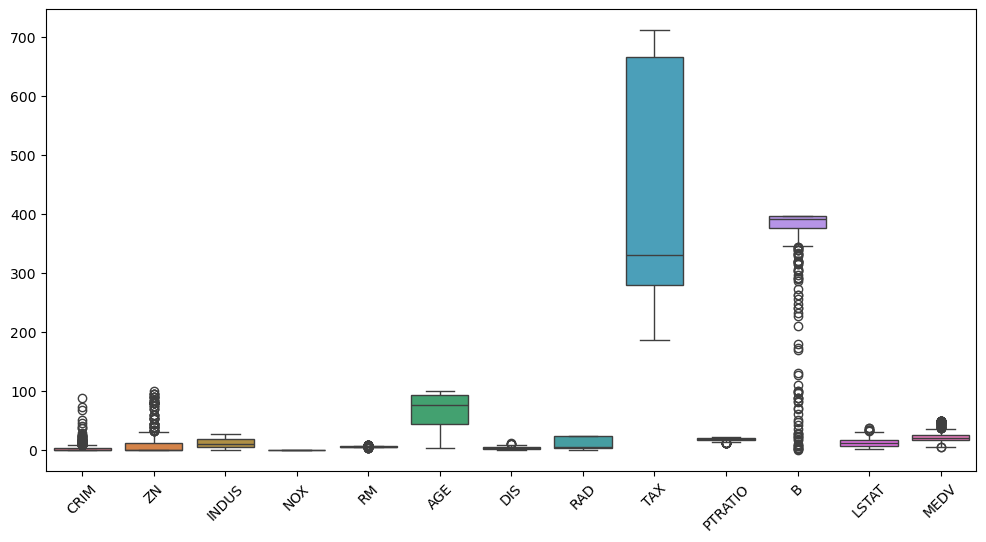

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=['CHAS']))
plt.xticks(rotation=45)
plt.show()

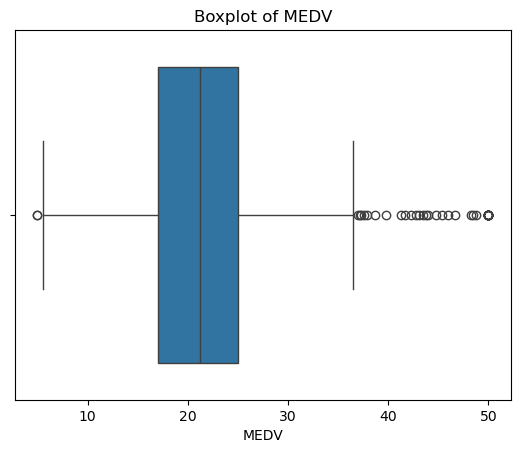

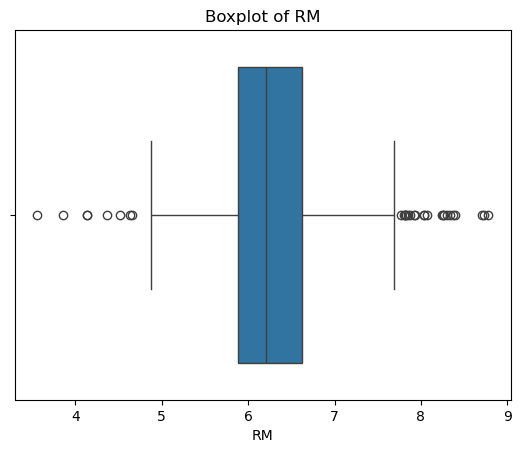

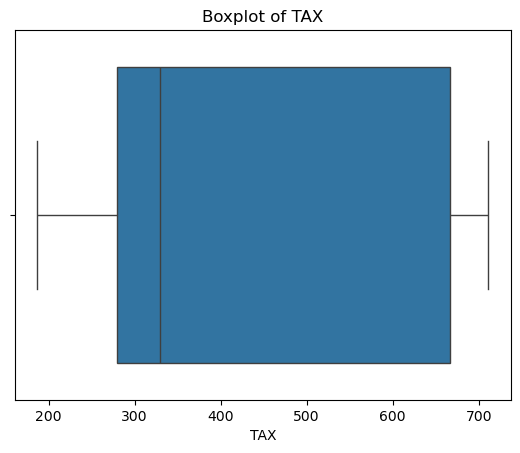

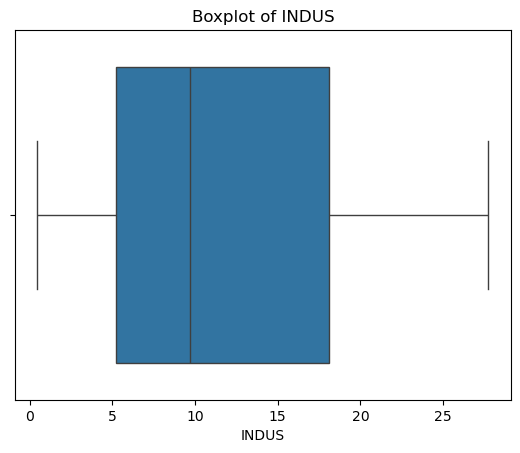

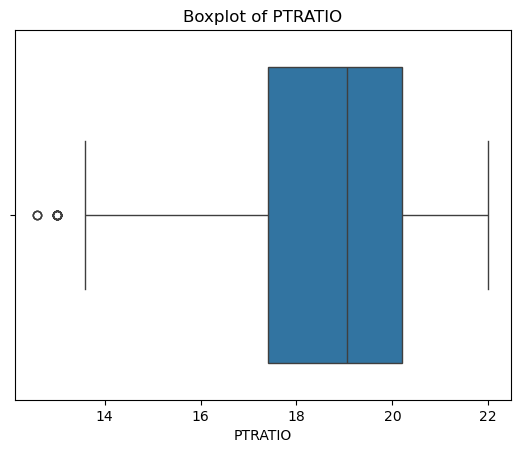

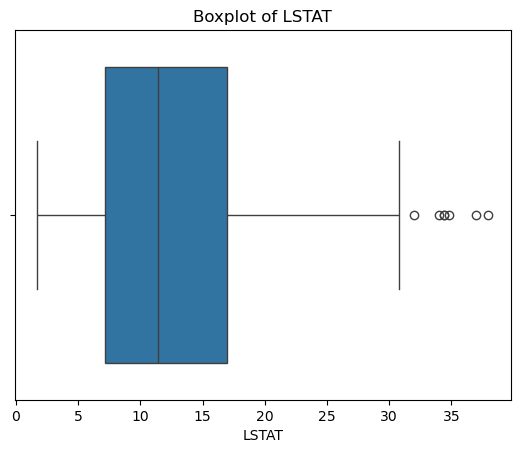

In [10]:
# Boxplot for MEDV
sns.boxplot(x=df['MEDV'])
plt.title("Boxplot of MEDV")
plt.show()

# box plot of top 6 features
for i in range(len(top_features)):
    sns.boxplot(x=df[top_features[i]])
    plt.title(f"Boxplot of {top_features[i]}")
    plt.show()


**Step 5: Identifying Missing Values**

Missing Values:
        Missing Values  % Missing
CRIM               20       3.95
ZN                 20       3.95
INDUS              20       3.95
CHAS               20       3.95
AGE                20       3.95
LSTAT              20       3.95


<function matplotlib.pyplot.show(close=None, block=None)>

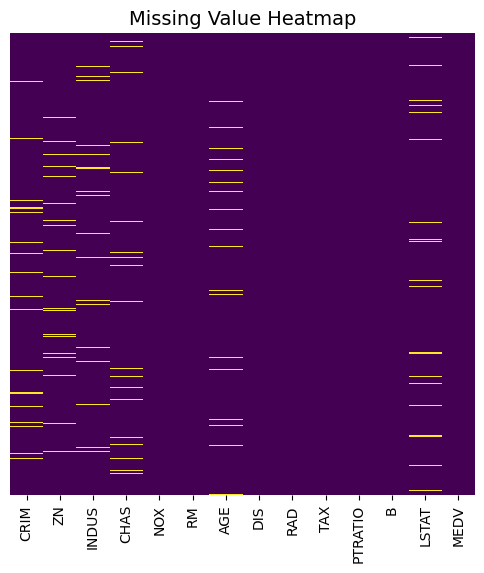

In [14]:
# Total missing values per column
missing_values = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    '% Missing': round(df.isnull().mean()*100,2)
}).sort_values('% Missing', ascending=False)

print("Missing Values:\n", missing_values[missing_values['Missing Values']>0])

# Visualize missing data
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Value Heatmap", fontsize=14)
plt.show